# KNN


## 讀取檔案

In [1]:
import pandas as pd
import numpy as np
from sklearn import datasets
%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [2]:
iris = datasets.load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [3]:
#建立成Dataframe
iris_df = pd.DataFrame(iris.data[:, [0,1,2,3]], columns=iris.feature_names[:])
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


## 可視化數據

In [4]:
X = iris.data[:, [0,1,2, 3]]
X.shape

(150, 4)

In [5]:
x = iris.data[:, [2, 3]]
x.shape

(150, 2)

In [6]:
y = iris.target
y.shape

(150,)

### 拆分資料

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=0)

print(X_train.shape, X_test.shape)

(105, 4) (45, 4)


### 資料標準化

In [8]:
from sklearn.preprocessing import StandardScaler

In [9]:
sc = StandardScaler()

sc.fit(X_train)

StandardScaler()

In [10]:
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

print(pd.DataFrame(X_train_std, columns=iris_df.columns))

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0            -1.023664         -2.378463          -0.182950         -0.293181
1             0.695175         -0.101903           0.930661          0.737246
2             0.924353          0.581065           1.042022          1.638870
3             0.122229         -1.923151           0.652258          0.350836
4             0.924353         -1.240183           1.097702          0.737246
..                 ...               ...                ...               ...
100          -1.138253          0.125753          -1.296561         -1.452412
101           0.465996         -0.329559           0.986341          0.737246
102          -0.106950         -0.784871           0.151133         -0.293181
103           2.070245          1.719344           1.598827          1.252460
104          -1.482021          0.353409          -1.352242         -1.323609

[105 rows x 4 columns]


## 可視化數據

In [11]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

C:\Users\SamuelZovith\AppData\Local\Temp\ipykernel_11292\4115098246.py:5: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],     #拿第一項跟第二項特徵來畫圖


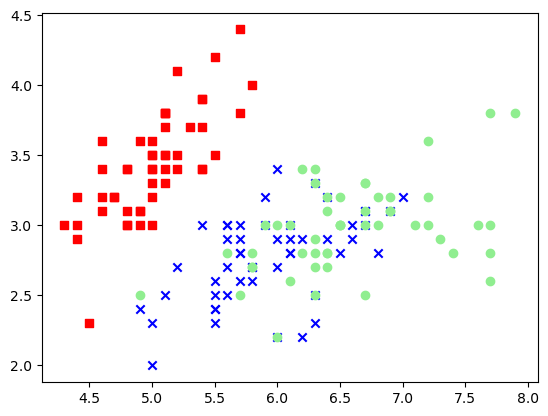

In [12]:
markers = ('s', 'x', 'o')
colors = ('red', 'blue', 'lightgreen')
cmap = ListedColormap(colors[:len(np.unique(y_test))])
for idx, cl in enumerate(np.unique(y)):
    plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],     #拿第一項跟第二項特徵來畫圖
               c=cmap(idx), marker=markers[idx], label=cl)

C:\Users\SamuelZovith\AppData\Local\Temp\ipykernel_11292\2525049505.py:5: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x=X[y == cl, 2], y=X[y == cl, 3],     #拿第三項跟第四項特徵來畫圖


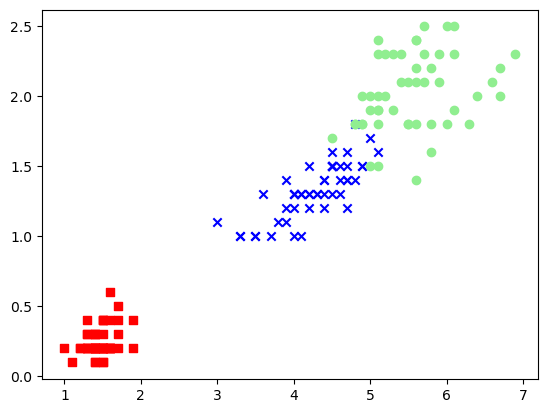

In [13]:
markers = ('s', 'x', 'o')
colors = ('red', 'blue', 'lightgreen')
cmap = ListedColormap(colors[:len(np.unique(y_test))])
for idx, cl in enumerate(np.unique(y)):
    plt.scatter(x=X[y == cl, 2], y=X[y == cl, 3],     #拿第三項跟第四項特徵來畫圖
               c=cmap(idx), marker=markers[idx], label=cl)

# KNN

In [14]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [15]:
knn = KNeighborsClassifier(n_neighbors=5, p=2, metric='minkowski')     #p=2表示用歐式距離算距離，p=1表示用曼哈頓距離算距離
knn.fit(X_train_std, y_train)

KNeighborsClassifier()

In [16]:
knn.score(X_train_std, y_train)

0.9714285714285714

In [17]:
knn.score(X_test_std, y_test)

0.9777777777777777

In [18]:
y_pred = knn.predict(X_test_std)
y_pred

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 2, 1, 1, 2, 0, 2, 0,
       0])

In [19]:
confusion_matrix(y_test,y_pred)

array([[16,  0,  0],
       [ 0, 17,  1],
       [ 0,  0, 11]], dtype=int64)

In [21]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      0.94      0.97        18
           2       0.92      1.00      0.96        11

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45

